# Cargar Datos

**Proyecto:** Pipeline MLOps - Predicción de Pago a Tiempo de Créditos

**Autor:** Dody Dueñas

---

## Objetivo

Este notebook tiene como objetivo cargar los datos desde un archivo (Excel/CSV) y realizar una primera revisión de la estructura y calidad de los datos. En un entorno productivo, estos datos provendrían de un Data Warehouse o Data Lake de la empresa.

## Dataset

El dataset contiene información sobre créditos financieros y características de los clientes, con el objetivo de predecir si el cliente pagará a tiempo (`Pago_atiempo`).

## 1. Importar Librerías

In [8]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Para manejo de rutas
import os
from pathlib import Path

# Configuración de pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Semilla para reproducibilidad
np.random.seed(42)

print("✓ Librerías importadas exitosamente")

✓ Librerías importadas exitosamente


## 2. Definir Rutas de Archivos

In [9]:
# Obtener el directorio raíz del proyecto
# Estamos en mlops_pipeline/src/, necesitamos subir 2 niveles
try:
    RUTA_RAIZ = Path.cwd().parent.parent
    # Intentar primero con XLSX que es el archivo existente conocido
    RUTA_DATOS = RUTA_RAIZ / 'Base_de_datos.xlsx'
    if not RUTA_DATOS.exists():
        # Fallback a CSV si el XLSX no está
        RUTA_DATOS = RUTA_RAIZ / 'Base_de_datos.csv'
except:
     # Fallback simple para ejecución local directa
    RUTA_DATOS = Path('Base_de_datos.xlsx')

print(f"Directorio raíz calculado: {RUTA_RAIZ}")
print(f"Ruta del archivo de datos: {RUTA_DATOS}")
print(f"¿El archivo existe?: {RUTA_DATOS.exists()}")

Directorio raíz calculado: c:\Users\DODY DUEÑAS\Documents\Proyecto IntegradorM5_Dody_Salim_Dueñas_Remache
Ruta del archivo de datos: c:\Users\DODY DUEÑAS\Documents\Proyecto IntegradorM5_Dody_Salim_Dueñas_Remache\Base_de_datos.xlsx
¿El archivo existe?: True


## 3. Cargar el Dataset

In [10]:
# Cargar datos
try:
    if str(RUTA_DATOS).endswith('.xlsx'):
        df = pd.read_excel(RUTA_DATOS)
    else:
        df = pd.read_csv(RUTA_DATOS)
        
    print("✓ Datos cargados exitosamente")
    print(f"\nDimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo {RUTA_DATOS}")
    print("Por favor, verifica que el archivo existe en la raíz del proyecto.")
except Exception as e:
    try:
        # Intento de carga directa si falla la ruta calculada
        df = pd.read_excel('Base_de_datos.xlsx')
        print("✓ Datos cargados exitosamente (Directo)")
    except:
        print(f"❌ Error crítico al cargar los datos: {str(e)}")

✓ Datos cargados exitosamente

Dimensiones del dataset: 10763 filas x 23 columnas


## 4. Exploración Inicial de los Datos

Realizamos una primera inspección visual de los datos para familiarizarnos con su estructura.

In [11]:
# Mostrar las primeras filas
print("="*80)
print("PRIMERAS 5 FILAS DEL DATASET")
print("="*80)
df.head()

PRIMERAS 5 FILAS DEL DATASET


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.000,10,42,Independiente,8000000,2500000,341296,88.768,695.000,10,5,0.000,51258.000,51258.000,0.000,5,0,0,908526.000,Estable,1
1,4,2025-04-22 09:47:35,840000.000,6,60,Empleado,3000000,2000000,124876,95.228,789.000,3,1,0.000,8673.000,8673.000,0.000,0,0,2,939017.000,Creciente,1
2,9,2026-01-08 12:22:40,5974028.400,10,36,Independiente,4036000,829000,529554,47.614,740.000,4,5,0.000,18702.000,18702.000,0.000,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.000,6,48,Empleado,1524547,498000,252420,95.228,837.000,4,4,0.000,15782.000,15782.000,0.000,3,0,0,1536193.000,Creciente,1
4,9,2025-04-26 11:24:26,2781636.000,11,44,Empleado,5000000,4000000,217037,95.228,771.000,4,6,0.000,204804.000,204804.000,0.000,3,0,1,933473.000,Creciente,1


In [12]:
# Información general del dataset
print("="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
df.info()

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  flo

In [13]:
# Nombres de las columnas
print("="*80)
print("COLUMNAS DEL DATASET")
print("="*80)
print(f"\nTotal de columnas: {len(df.columns)}\n")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

COLUMNAS DEL DATASET

Total de columnas: 23

 1. tipo_credito
 2. fecha_prestamo
 3. capital_prestado
 4. plazo_meses
 5. edad_cliente
 6. tipo_laboral
 7. salario_cliente
 8. total_otros_prestamos
 9. cuota_pactada
10. puntaje
11. puntaje_datacredito
12. cant_creditosvigentes
13. huella_consulta
14. saldo_mora
15. saldo_total
16. saldo_principal
17. saldo_mora_codeudor
18. creditos_sectorFinanciero
19. creditos_sectorCooperativo
20. creditos_sectorReal
21. promedio_ingresos_datacredito
22. tendencia_ingresos
23. Pago_atiempo


In [14]:
# Tipos de datos por columna
print("="*80)
print("TIPOS DE DATOS POR COLUMNA")
print("="*80)
tipos_datos = df.dtypes.value_counts()
print(f"\nResumen:")
print(tipos_datos)
print(f"\nDetalle por columna:")
print(df.dtypes)

TIPOS DE DATOS POR COLUMNA

Resumen:
int64             12
float64            8
object             2
datetime64[ns]     1
Name: count, dtype: int64

Detalle por columna:
tipo_credito                              int64
fecha_prestamo                   datetime64[ns]
capital_prestado                        float64
plazo_meses                               int64
edad_cliente                              int64
tipo_laboral                             object
salario_cliente                           int64
total_otros_prestamos                     int64
cuota_pactada                             int64
puntaje                                 float64
puntaje_datacredito                     float64
cant_creditosvigentes                     int64
huella_consulta                           int64
saldo_mora                              float64
saldo_total                             float64
saldo_principal                         float64
saldo_mora_codeudor                     float64
creditos_sector

## 5. Valores Nulos

Identificamos la presencia de valores nulos en cada columna.

In [15]:
# Análisis de valores nulos
print("="*80)
print("ANÁLISIS DE VALORES NULOS")
print("="*80)

nulos = df.isnull().sum()
nulos_pct = (df.isnull().sum() / len(df)) * 100

resumen_nulos = pd.DataFrame({
    'Valores_Nulos': nulos,
    'Porcentaje': nulos_pct
}).sort_values(by='Valores_Nulos', ascending=False)

# Filtrar solo columnas con nulos
resumen_nulos_filtrado = resumen_nulos[resumen_nulos['Valores_Nulos'] > 0]

if len(resumen_nulos_filtrado) > 0:
    print(f"\nColumnas con valores nulos: {len(resumen_nulos_filtrado)}\n")
    print(resumen_nulos_filtrado)
else:
    print("\n✓ No se encontraron valores nulos en ninguna columna")

print(f"\nTotal de valores nulos en todo el dataset: {df.isnull().sum().sum()}")

ANÁLISIS DE VALORES NULOS

Columnas con valores nulos: 7

                               Valores_Nulos  Porcentaje
tendencia_ingresos                      2932      27.241
promedio_ingresos_datacredito           2930      27.223
saldo_mora_codeudor                      590       5.482
saldo_principal                          405       3.763
saldo_total                              156       1.449
saldo_mora                               156       1.449
puntaje_datacredito                        6       0.056

Total de valores nulos en todo el dataset: 7175


## 6. Estadísticas Descriptivas Básicas

In [16]:
# Estadísticas para variables numéricas
print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*80)
df.describe()

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,10763.000,10763,10763.000,10763.000,10763.000,10763.000,10763.000,10763.000,10763.000,10757.000,10763.000,10763.000,10607.000,10607.000,10358.000,10173.000,10763.000,10763.000,10763.000,7833.000,10763.000
mean,5.411,2025-04-16 23:06:02.111121664,2434315.001,10.576,43.949,17216431.460,6238869.649,243617.407,91.170,780.791,5.727,4.229,7.746,45937.408,40346.168,0.260,2.780,0.270,1.303,2005156.812,0.953
min,4.000,2024-11-26 09:17:04,360000.000,2.000,19.000,0.000,0.000,23944.000,-38.010,-7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.000,2025-01-20 17:33:07.500000,1224831.000,6.000,33.000,2000000.000,500000.000,121041.500,95.228,757.000,3.000,2.000,0.000,2898.000,2690.000,0.000,1.000,0.000,0.000,925157.000,1.000
50%,4.000,2025-03-27 16:23:12,1921920.000,10.000,42.000,3000000.000,1000000.000,182863.000,95.228,791.000,5.000,4.000,0.000,16178.000,14442.500,0.000,2.000,0.000,1.000,1204496.000,1.000
75%,9.000,2025-06-16 13:27:58,3084840.000,12.000,53.000,4875808.000,2000000.000,287833.500,95.228,825.000,8.000,6.000,0.000,52982.000,47632.250,0.000,4.000,0.000,2.000,2231859.000,1.000
max,68.000,2026-04-26 18:43:52,41444152.800,90.000,123.000,22000000000.000,6787675263.000,3816752.000,95.228,999.000,62.000,29.000,12534.000,5116066.000,1562285.000,2145.000,51.000,13.000,25.000,38106581.000,1.000
std,2.338,NaN,1909642.759,6.632,15.061,355476717.603,118418316.941,210493.695,16.465,104.878,3.977,3.065,225.955,106269.790,71242.440,21.773,2.749,0.716,1.824,2144116.150,0.213


In [17]:
# Estadísticas para variables categóricas
print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("="*80)
df.describe(include='object')

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS


,tipo_laboral,tendencia_ingresos
count,10763,7831
unique,2,46
top,Empleado,Creciente
freq,6754,5294


## 7. Análisis de la Variable Objetivo

La variable objetivo es `Pago_atiempo`, que indica si el cliente pagó a tiempo (1) o no (0).

ANÁLISIS DE LA VARIABLE OBJETIVO: Pago_atiempo

Distribución:
              Frecuencia  Porcentaje
Pago_atiempo                        
0                    511       4.748
1                  10252      95.252


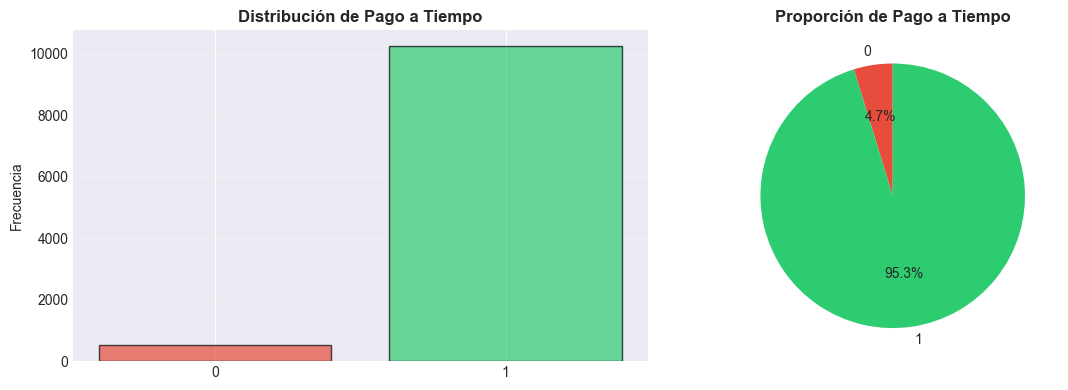


Ratio de balance de clases: 0.05
⚠️  Advertencia: El dataset presenta desbalance de clases significativo.
    Se recomienda aplicar técnicas de balanceo durante el entrenamiento del modelo.


In [18]:
# Distribución de la variable objetivo
print("="*80)
print("ANÁLISIS DE LA VARIABLE OBJETIVO: Pago_atiempo")
print("="*80)

if 'Pago_atiempo' in df.columns:
    distribucion_objetivo = df['Pago_atiempo'].value_counts().sort_index()
    distribucion_pct = df['Pago_atiempo'].value_counts(normalize=True).sort_index() * 100

    resumen_objetivo = pd.DataFrame({
        'Frecuencia': distribucion_objetivo,
        'Porcentaje': distribucion_pct
    })

    print("\nDistribución:")
    print(resumen_objetivo)

    # Visualización
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Gráfico de barras
    ax[0].bar(distribucion_objetivo.index.astype(str), distribucion_objetivo.values, 
              color=['#e74c3c', '#2ecc71'] if len(distribucion_objetivo) == 2 else 'skyblue', alpha=0.7, edgecolor='black')
    ax[0].set_title('Distribución de Pago a Tiempo', fontsize=12, fontweight='bold')
    ax[0].set_ylabel('Frecuencia')
    ax[0].grid(axis='y', alpha=0.3)

    # Gráfico de torta
    ax[1].pie(distribucion_objetivo.values, labels=distribucion_objetivo.index.astype(str),
              autopct='%1.1f%%', colors=['#e74c3c', '#2ecc71'] if len(distribucion_objetivo) == 2 else None, startangle=90)
    ax[1].set_title('Proporción de Pago a Tiempo', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Verificar balance de clases
    if len(distribucion_objetivo) > 0:
        ratio = distribucion_objetivo.min() / distribucion_objetivo.max()
        print(f"\nRatio de balance de clases: {ratio:.2f}")
        if ratio < 0.5:
            print("⚠️  Advertencia: El dataset presenta desbalance de clases significativo.")
            print("    Se recomienda aplicar técnicas de balanceo durante el entrenamiento del modelo.")
        else:
            print("✓ Las clases están razonablemente balanceadas.")
else:
    print("⚠️ Advertencia: La columna 'Pago_atiempo' no se encontró en el dataset.")

## 8. Resumen de la Carga de Datos

In [19]:
print("="*80)
print("RESUMEN DE LA CARGA DE DATOS")
print("="*80)
print(f"\n✓ Dataset cargado exitosamente")
print(f"\n📊 Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"\n📋 Tipos de datos:")
for dtype, count in df.dtypes.value_counts().items():
    print(f"   - {dtype}: {count} columnas")
print(f"\n❓ Valores nulos: {df.isnull().sum().sum():,} ({(df.isnull().sum().sum() / df.size * 100):.2f}% del total)")
if 'Pago_atiempo' in df.columns:
    print(f"\n🎯 Variable objetivo: Pago_atiempo")
    if len(distribucion_objetivo) == 2:
        print(f"   - Clase 0 (No pagó a tiempo): {distribucion_objetivo.get(0, 0):,} ({distribucion_pct.get(0, 0):.1f}%)")
        print(f"   - Clase 1 (Pagó a tiempo): {distribucion_objetivo.get(1, 0):,} ({distribucion_pct.get(1, 0):.1f}%)")
print(f"\n✓ Datos listos para el análisis exploratorio (EDA)")
print("\n" + "="*80)

RESUMEN DE LA CARGA DE DATOS

✓ Dataset cargado exitosamente

📊 Dimensiones: 10,763 filas x 23 columnas

📋 Tipos de datos:
   - int64: 12 columnas
   - float64: 8 columnas
   - object: 2 columnas
   - datetime64[ns]: 1 columnas

❓ Valores nulos: 7,175 (2.90% del total)

🎯 Variable objetivo: Pago_atiempo
   - Clase 0 (No pagó a tiempo): 511 (4.7%)
   - Clase 1 (Pagó a tiempo): 10,252 (95.3%)

✓ Datos listos para el análisis exploratorio (EDA)



## 9. Guardar Referencia al DataFrame

El DataFrame `df` está disponible para su uso en el siguiente notebook de análisis exploratorio.

In [20]:
# Verificar que el DataFrame está cargado en memoria
print(f"DataFrame 'df' disponible en memoria con {df.shape[0]:,} registros")
print("\n✓ Listo para proceder con comprension_eda.ipynb")

DataFrame 'df' disponible en memoria con 10,763 registros

✓ Listo para proceder con comprension_eda.ipynb
